<a href="https://colab.research.google.com/github/leesm0409/bootcamp/blob/main/06_(2)%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80_%EB%AA%A8%EB%8D%B8%EC%9D%84_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%9E%90%EB%8F%99%EC%B0%A8%EC%97%B0%EB%B9%84_(MPG)_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.7 MB/s eta 0:00:00


#선형 회귀 모델을 이용한 자동차연비 (MPG) 예측

## 기본 라이브러리 임포트

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

## 데이터 준비하기

In [ ]:
df = pd.read_csv('/content/auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## 데이터 전처리

In [ ]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
#horsepower 컬럼의 ? 값 제거
#? -> NaN -> dropna()  삭제 -> horsepower 컬럼 dtype를 float 변환

df['horsepower'].replace('?',np.nan, inplace=True)
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
df.dropna(subset=['horsepower'], axis=0, inplace = True)
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [ ]:
#데이터타입 변경
df['horsepower'] = df['horsepower'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


## 예측 모델 성능평가

*   feature 선택 -> 3개 이상
*   훈련셋(70%), 테스트셋(30%), random_state=7 고정
*   모델 선택 (LinearRegression, Ridge, Lasso) 사용
*   모델의 정확도가 가장 높은 모델 선택 ( alpha 조정 가능)
*   훈련셋과 테스트셋 결과 출력(차트도 가능)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# feature 선택
selected_features = ['cylinders', 'horsepower', 'weight', 'acceleration']

# 데이터 전처리
X = df[selected_features]
y = df['mpg']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)




In [ ]:
X_train.shape

(274, 4)

In [ ]:
X_test.shape

(118, 4)

### 모델객체 생성 및 학습하기

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('lr.coef_ : ',lr.coef_) # 가중치 (w)
print('lr.intercept_ : ', lr.intercept_) # 절편 (b)

lr.coef_ :  [-0.5982219  -0.02915293 -0.00568636 -0.03341626]
lr.intercept_ :  47.19099563650285


In [ ]:
# score() 메서드 -> 결정계수 R2(0~1)
#훈련데이터, 테스트데이터의 차이를 확인 -> LinearRegression -> 과소적합 상태 -> 모델 변경
print('훈련 데이터셋의 R2: ', lr.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', lr.score(X_test, y_test))

훈련 데이터셋의 R2:  0.6978361080219668
테스트 데이터셋의 R2:  0.7234586440082567


###릿지회귀

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)

In [ ]:
# score() 메서드 -> 결정계수 R2(0~1)
# 훈련데이터, 테스트데이터의 차이를 확인 -> Ridge
print('훈련 데이터셋의 R2: ', ridge.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', ridge.score(X_test, y_test))

훈련 데이터셋의 R2:  0.697835940800261
테스트 데이터셋의 R2:  0.7235140172281378


In [ ]:
# alpha =0.01으로 값을 내리면 -> 규제 약화 -> 공부더하기 -> 모델 선택
ridge001 = Ridge(alpha=0.01).fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', ridge001.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', ridge001.score(X_test, y_test))

훈련 데이터셋의 R2:  0.6978361080049814
테스트 데이터셋의 R2:  0.7234592042281602


In [ ]:
# alpha =10으로 값을 올리면 -> 규제 강화 -> 공부덜하기 -> 과소접합
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print('훈련 데이터셋의 R2: ', ridge10.score(X_train, y_train))
print('테스트 데이터셋의 R2: ', ridge10.score(X_test, y_test))

훈련 데이터셋의 R2:  0.6978215211640793
테스트 데이터셋의 R2:  0.7239590621012545


Training MSE: 18.384992958746945, Training R-squared: 0.697835940800261
Testing MSE: 16.738529902943654, Testing R-squared: 0.7235140172281378


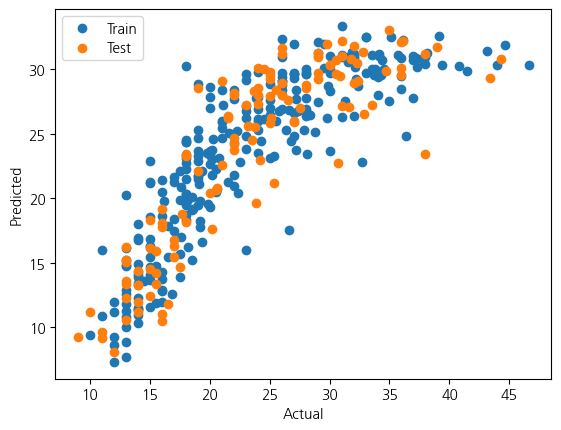

In [ ]:

# 훈련셋과 테스트셋에 대한 예측 결과
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)
# 평가 지표 출력
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_mse}, Training R-squared: {train_r2}")
print(f"Testing MSE: {test_mse}, Testing R-squared: {test_r2}")

# 차트로 비교
plt.scatter(y_train, y_train_pred, label='Train')
plt.scatter(y_test, y_test_pred, label='Test')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()
